<a href="https://colab.research.google.com/github/imymemineyay/Study_Python/blob/main/Python_dojang(Unit38_39).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unit 38. 예외 처리 사용하기**


예외란 코드를 실행하는 중에 발생한 에러를 뜻함


In [ ]:
def ten_div(x):
  return 10/x

In [ ]:
ten_div(5.0)

2.0

In [ ]:
ten_div(0)

ZeroDivisionError: ignored

ZeroDivisionError뿐만 아니라 지금까지 만난 AttributeError, NameError, TypeError 등 다양한 에러들도 모두 예외임

38.1 try except로 사용하기

- 예외가 발생하더라도 스크립트 실행을 중단하지 않고 계속 실행하게 해주는 예외 처리 방법 

      try:
        실행할 코드
      except:
        예외가 발생했을 대 처리하는 코드

In [ ]:
try:
  x = int(input('나눌 숫자를 입력하세요 :'))
  y = 10 / x 
  print(y)
except: # try 코드에서 에러 발생 시 except코드 실행됨
  print('예외가 발생하였습니다.') 

나눌 숫자를 입력하세요 :0
예외가 발생하였습니다.


- 특정 예외만 처리하기

      try:
         실행할 코드
      except 예외이름:
         예외가 발생했을 때 처리하는 코드


In [ ]:
y = [10,20,30]

try:
  index, x = map(int,input('인덱스와 나눌 숫자를 입력하세요').split())
  print(y[index] / x)
except ZeroDivisionError:
  print('숫자를 0으로 나눌 수 없습니다.')
except IndexError:
  print('잘못된 인덱스입니다.')

인덱스와 나눌 숫자를 입력하세요3 5
잘못된 인덱스입니다.


- 예외의 에러 메세지 받아오기

      try:
         실행할 코드
      except 예외 as 변수:
         예외가 발생했을 때 처리하는 코드

In [ ]:
y = [10, 20, 30]

try:
  index, x = map(int, input('인덱스와 나눌 숫자를 입력하세요 : ').split())
  print(y[index] / x)
except ZeroDivisionError as e: 
  print('숫자를 0으로 나눌 수 없습니다.', e) # 예외에 해당하는 에러 메세지 출력 
except IndexError as e:
  print('잘못된 인덱스 입니다.', e)

인덱스와 나눌 숫자를 입력하세요 : 2 0
숫자를 0으로 나눌 수 없습니다. division by zero


<참고>

예외 계층

예외도 클래스 상속으로 구현되며 다음과 같이 계층으로 이루어져 있음

보통 파이썬에서 새로운 예외를 만들 때는 Exception을 상속받아서 구현함

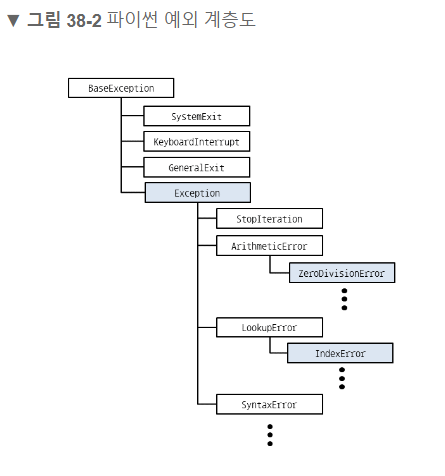

38.2 else와 finally 사용하기

예외가 발생하지 않았을 때 코드를 실행하는 else를 사용

      try:
        실행할 코드
      except:
        예외가 발생했을 때 처리하는 코드
      else:
        예외가 발생하지 않았을 때 실행할 코드

In [ ]:
try: 
  x = int(input('나눌 숫자를 입력하세요 : '))
  y = 10 / x
except ZeroDivisionError:
  print('숫자를 0으로 나눌 수 없습니다.')
else:
  print(y)

나눌 숫자를 입력하세요 : 0
숫자를 0으로 나눌 수 없습니다.


- 예외와는 상관없이 항상 코드 실행하기

      try:
        실행할 코드
      except:
        예외가 발생했을 때 처리하는 코드
      else:
        예외가 발생하지 않았을 때 실행할 코드
      fianally:
        예외 발생 여부와 상관없이 항상 실행할 코드

In [ ]:
try:
  x = int(input('나눌 숫자를 입력하세요 : '))
  y = 10 / x
except ZeroDivisionError:
  print('숫자를 0으로 나눌 수 없습니다.')
else:
  print(y)
finally:
  print('코드 실행이 끝났습니다.')

나눌 숫자를 입력하세요 : 0
숫자를 0으로 나눌 수 없습니다.
코드 실행이 끝났습니다.


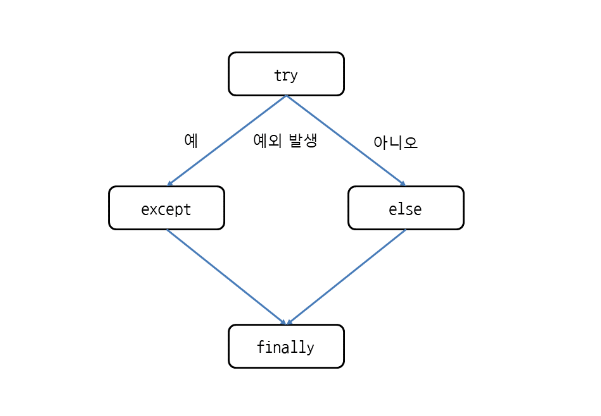

<참고>

try안에서 만든 변수는 try바깥에서 사용할 수 있나요?

▶ try는 함수가 아니므로 스택 프레임을 만들지 않아 try바깥에서 사용 가능

물론, except, else, finally에서도 사용 가능

38.3 예외 발생시키기

정해진 예외 외에 직접 예외를 발생시킬 수 있음

      raise 예외('에러메세지')

In [ ]:
try:
  x = int(input('3의 배수를 입력하세요 : '))
  if x % 3 != 0 :
    raise Exception('3의 배수가 아닙니다.')
  print(x)
except Exception as e:
  print('예외가 발생했습니다.', e)

3의 배수를 입력하세요 : 5
예외가 발생했습니다. 3의 배수가 아닙니다.


- raise의 처리 과정

예외가 발생하더라도 현재 코드 블록에서 처리해줄 except가 없다면 except가 나올 때까지 계속 상위 코드 블록으로 올라감

만약 함수 바깥에도 처리해줄 except가 없다면 코드 실행은 중지되고 에러가 표시됨

In [ ]:
def three_multiple():
  x = int(input('3의 배수를 입력하세요 : '))
  if x % 3 != 0:
    raise Exception('3의 배수가 아닙니다.')
  print(x)

try:
  three_multiple()
except Exception as e:
  print('예외가 발생했습니다.', e)

3의 배수를 입력하세요 : 5
예외가 발생했습니다. 3의 배수가 아닙니다.


In [ ]:
three_multiple() # except가 없는 상태 에러 발생

3의 배수를 입력하세요 : 10


Exception: ignored

- 현재 예외를 다시 발생시키기

except 안에서 raise를 사용하면 현재 예외를 다시 발생시킴(re-raise)

        raise

In [ ]:
def three_multiple():
  try:
    x = int(input("3의 배수를 입력하세요 : "))
    if x % 3 != 0 :
      raise Exception('3의 배수가 아닙니다.')
    print(x)
  except Exception as e:
    print('three_multiple 함수에서 예외가 발생했습니다.', e)
    raise

try: 
  three_multiple()
except Exception as e:
  print('스크립트 파일에서 예외가 발생했습니다.', e)

3의 배수를 입력하세요 : 5
three_multiple 함수에서 예외가 발생했습니다. 3의 배수가 아닙니다.
스크립트 파일에서 예외가 발생했습니다. 3의 배수가 아닙니다.


three_multiple 함수 안에서 발생한 예외를 함수 안의 except에서 한 번 처리하고, raise로 예외를 다시 발생시켜서 상위 코드 블록으로 넘김

그다음에 함수 바깥의 except에서 예외를 처리

▶ 이런 방식으로 같은 예외를 계속 처리해줄 수 있음

참고로 raise만 사용하면 같은 예외를 상위 코드 블록으로 넘기지만 raise에 다른 예외를 지정하고 에러 메시지를 넣을 수도 있음

      raise 예외('에러메세지')

In [ ]:
def three_multiple():
  try:
    x = int(input("3의 배수를 입력하세요 : "))        
    if x % 3 != 0:
      raise Exception('3의 배수가 아닙니다.')
    print(x)
  except Exception as e:
    print('three_multiple 함수에서 예외가 발생했습니다.', e)
    raise RuntimeError('three_multiple 함수에서 예외가 발생했습니다.')

<참고>
assert로 예외 발생시키기

assert : 지정된 조건식이 거짓일 때 AssertionError예외를 발생시키며 조건식이 참이면 그냥 넘어감

- assert는 나와서는 안 되는 조건을 검사할 때 사용
- assert는 디버긴 모드에서만 실행됨
- assert 실행되지 않게 하려면, python에 -0 옵션을 붙여서 실행

        assert 조건식
        assert 조건식, 에러메세지

In [ ]:
x = int(input('3의 배수를 입력하세요: '))
assert x % 3 == 0, '3의 배수가 아닙니다.'    # 3의 배수가 아니면 예외 발생, 3의 배수이면 그냥 넘어감
print(x)

3의 배수를 입력하세요: 5


AssertionError: ignored

38.4 예외 만들기

사용자 지정 예외 : 프로그래머가 직접 만든 예외

      class 예외이름(Exception):
          def __init__(self):
              super().__init__('에러메세지')

In [ ]:
class NotThreeMultipleError(Exception):
  def __init__(self):
    super().__init__('3의 배수가 아닙니다.')

def three_multiple():
  try:
    x = int(input('3의 배수를 입력하세요 : '))
    if x % 3 != 0:
      raise NotThreeMultipleError
    print(x)
  except Exception as e:
    print('예외가 발생했습니다.', e)
  
three_multiple()

3의 배수를 입력하세요 : 5
예외가 발생했습니다. 3의 배수가 아닙니다.


In [ ]:
try:   
    file = open('maria.txt', 'r')
except FileNotFoundError:                         
    print('파일이 없습니다.')
else:    
    s = file.read()
    file.close()

파일이 없습니다.


연습문제)

표준 입력으로 문자열이 입력됩니다. 다음 소스 코드를 완성하여 입력된 문자열이 회문이면 문자열을 그대로 출력하고, 회문이 아니면 '회문이 아닙니다.'를 출력하도록 만드세요. palindrome 함수와 NotPalindromeError 예외를 작성해야 합니다.

In [ ]:
class NotPalindromeError(Exception):
  def __init__(self):
    super().__init__('회문이 아닙니다.')

def palindrome(word):
  if word != word[::-1]:
    raise NotPalindromeError
  print(word)


try:
    word = input()
    palindrome(word)
except NotPalindromeError as e:
    print(e)

hello
회문이 아닙니다.


## **Unit 39. 이터레이터 사용하기**


이터레이터(반복자) 

: 값을 차례대로 꺼낼 수 있는 객체

: 반복할 위치를 알려줌

- 이터레이터만 생성하고 값이 필요한 시점이 되었을 때 값을 만드는 방식을 사용

- 지연 평가 : 데이터 생성을 뒤로 미루는 것


for i in range(100) 

: 반복할 때마다 이터레이터에서 숫자를 하나씩 꺼내서 반복하는 것


- 반복 가능한 객체 알아보기

반복 가능한 객체 : 반복할 수 있는 객체 

ex) 문자열, 리스트, 딕셔너리, 세트

→ 요소가 여러 개 들어있고, 한 번에 하나씩 꺼낼 수 있는 객체

- 반복 가능한 객체인지 알아보는 방법

__iter__ 메서드가 들어있는지 확인하면 됨

          dir(객체)


In [1]:
dir([1,2,3])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [2]:
[1, 2, 3].__iter__()

- 리스트의 이터레이터를 변수에 저장한 뒤 __next__ 메서드를 호출해보면 요소를 차례대로 꺼낼 수 있음

In [7]:
it = [1, 2, 3].__iter__()
print(it.__next__())
print(it.__next__())
print(it.__next__())
print(it.__next__()) # 꺼낼 요소가 없으면 StopIteration 예외를 발생시켜 반복을 끝냄

1
2
3


StopIteration: ignored

- for와 반복 가능한 객체

for에 range(3)을 사용했다면 먼저 range에서 __iter__ 로 이터레이터를 얻음

한 번 반복할 때마다 이터레이터에서 __next__로 숫자를 꺼내서 i에 저장하고, 지정된 숫자 3이 되면 StopIteration을 발생시켜서 반복을 끝냄

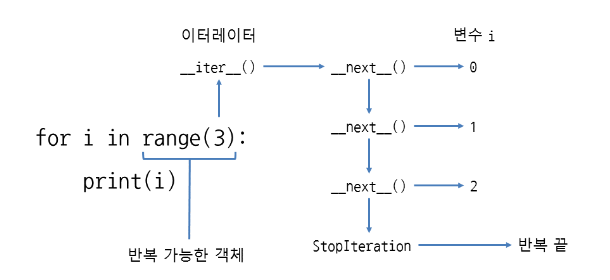

틀래스에 __iter__와 __next__ 메서드를 모두 구현하면 이터레이터를 만들 수 있음

득히, __iter__, __next__를 가진 객체를 이터레이터 프로토콜을 지원한다고 말함

※ 반복 가능한 객체와 이터레이터는 별개의 객체

즉, 반복 가능한 객체에서 __iter__메서드로 이터레이터를 얻음

<참고>

시퀀스 객체와 반복 가능한 객체의 차이

- 리스트, 튜플, range, 문자열은 반복 가능한 객체이면서 시퀀스 객체이다. 

하지만, 딕셔너리와 세트는 반복 가능한 객체이지만 시퀀스 객체는 아니다. 

왜냐하면 시퀀스 객체는 요소의 순서가 정해져 있는 연속적으로 이어져 있어야하는데, 딕셔너리와 세트는 요소(키)의 순서가 정해져 있지 않기 때문이다.

🎯🎯

즉, 요소의 순서가 정해져 있고 연속적으로 이어져 있으면 시퀀스 객체, 요소의 순서와는 상관없이 요소를 한 번에 하나씩 꺼낼 수 있으면 반복 가능한 객체 

- 이터레이터 만들기

        class 이터레이터이름:
            def __iter__(self):
                  코드
            def __next__(self):
                  코드

In [8]:
class Counter:
  def __init__(self, stop):
    self.current = 0 # 반복할 때마다 현재 숫자를 유지해야 하므로 속성에 0 넣어줘야 함
    self.stop = stop
  
  def __iter__(self): # __iter__을 호출해줄 반복 가능한 객체가 없으므로 현재 인스턴스를 반환해야 함
    return self       #  이 객체는 반복 가능한 객체이면서 이터레이터 
  
  def __next__(self):
    if self.current < self.stop:
      r = self.current

      self.current += 1
      return r
    
    else:
      raise StopIteration

for i in Counter(3):
  print(i, end = ' ')

0 1 2 

- 이터레이터 언패킹

Counter()의 결과를 변수 여러 개에 할당 가능

이터레이터가 반복하는 횟수와 변수의 개수는 일치해야 함

In [9]:
a, b, c = Counter(3)
print(a, b, c)

0 1 2


<참고>

map도 이터레이터

a, b, c = map(int, input().split())처럼 언패킹으로 변수 여러 개에 값을 할당 할 수 있음

<참고>

반환값을 _에 저장하는 이유

함수를 호출한 뒤 반환값을 저장할 때 _(밑줄 문자)를 사용하는 경우가 있음

반환값을 언패킹했을 때 _에 할당하는 것은 특정 순서의 반환값 사용하지 않고 무시하겠다는 관례적 표현


In [10]:
a,_,c,d = range(4)

a,c,d

(0, 2, 3)

39.3 인덱스로 접근할 수 있는 이터레이터 만들기

        class 이터레이터이름:
            def __getitem__(self, 인덱스):
               코드

In [11]:
class Counter:
  def __init__(self, stop):
    self.stop = stop
  
  def __getitem__(self, index): # __iter__, __next__는 생략 가능, 초깃값이 없다면 __init__도 생략가능
    if index < self.stop:
      return index
    else:
      raise IndexError

print(Counter(3)[0], Counter(3)[1], Counter(3)[2])

for i in Counter(3):
  print(i, end = ' ')

0 1 2
0 1 2 

39.4 iter, next 함수 활용하기

iter : __iter__ 메서드를 호출 (반복 가능한 객체에서 이터레이터를 반환)

next : 객체의 __next__ 메서드 호출 (이터레이터에서 값을 차례대로 꺼냄)

In [13]:
it = iter(range(3))
next(it)
next(it)
next(it)

2

iter : 반복을 끝낼 값을 지정하면 특정 값이 나올 때 반복을 끝냄

반복 가능한 객체 대신 호출 가능한 개체를 넣어줌

sentinel : 반복을 끝낼 값

            iter(호출가능한객체, 반복을끝낼값)

In [17]:
import random

it = iter(lambda : random.randint(0,5),2) # 호출 가능한 객체를 넣어야 하므로 
                                          # 매개 변수가 없는 함수 또는 람다 표현식으로 만듦

print(next(it))
print(next(it))
print(next(it))
print(next(it))
print(next(it))

1
1
5
0


StopIteration: ignored

In [18]:
import random 
for i in iter(lambda : random.randint(0,5), 2):
  print(i, end = ' ')
  

3 1 1 4 

In [20]:
import random
while True:
  i = random.randint(0,5)
  if i == 2 :
    break
  else:
    print(i, end = ' ')

5 

next : 기본값 지정 가능

기본값을 지정하면 반복이 끝나더라도 StopIteration이 발생하지 않고 기본값을 출력함

즉, 반복할 수 있을 때는 해당 값을 출력하고, 반복이 끝났을 때는 기본값을 출력함.

        next(반복가능한객체, 기본값)

In [21]:
it = iter(range(3))

print(next(it,10))
print(next(it,10))
print(next(it,10))
print(next(it,10))
print(next(it,10))


0
1
2
10
10


In [26]:
class MultipleIterator:
    def __init__(self, stop, multiple):
      self.stop = stop
      self.multiple = multiple
      self.current = 0     
                                 
 
    def __iter__(self):
        return self
 
    def __next__(self):
      self.current += 1
      if self.current * self.multiple < self.stop:
        return self.current * self.multiple
      else:
        raise StopIteration    
                                                     
 
for i in MultipleIterator(20, 3):
    print(i, end=' ')
 
print()
for i in MultipleIterator(30, 5):
    print(i, end=' ')

3 6 9 12 15 18 
5 10 15 20 25 

연습문제)

표준 입력으로 정수 세 개가 입력됩니다(첫 번째 정수는 시작하는 초, 두 번째 정수는 반복을 끝낼 초, 세 번째 정수는 인덱스이며 입력되는 초의 범위는 0-100000, 입력되는 인덱스의 범위는 0-10입니다). 다음 소스 코드에서 시간 값을 생성하는 이터레이터를 만드세요.

- 시간 값은 문자열이고 시:분:초 형식입니다. 만약 숫자가 한 자리일 경우 앞에 0을 붙입니다(예: 12:01:08).
- 1초는 00:00:01입니다. 23:59:59를 넘길 경우 00:00:00부터 다시 시작해야 합니다.
- 시간은 반복을 끝낼 초 직전까지만 출력해야 합니다(반복을 끝낼 초는 포함되지 않음).

In [30]:
class TimeIterator:
  def __init__(self,start,stop):
    self.start = start
    self.stop = stop
  
  def __getitem__(self,index):
    if index < self.stop - self.start:
      hour = (self.start + index) // 60 // 60 % 24
      minute = (self.start + index) // 60 % 60
      second = (self.start + index) % 60
      return '{0:02d}:{1:02d}:{2:02d}'.format(hour,minute,second)
    else:
      raise IndexError



start, stop, index = map(int, input().split())
 
for i in TimeIterator(start, stop):
    print(i)
 
print('\n', TimeIterator(start, stop)[index], sep='')

0 3 2
00:00:00
00:00:01
00:00:02

00:00:02
